In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('undersampled_train_dataset.csv')

In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how="any", inplace=True)

In [4]:
dataset = df.values

In [5]:
X = dataset[:, :-1]
Y = dataset[:, -1:]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
Y_train = Y_train.ravel()

X_test_std = scaler.transform(X_test)

In [8]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [10]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15, step=1)
_ = rfe.fit(X_train_std, Y_train)

In [10]:
rfe.support_

In [11]:
df.columns[:-1][rfe.support_]

Index(['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'chebyshev', 'canberra',
       'cityblock', 'word_mover_distance', 'skew_q1', 'skew_q2', 'cwc_max',
       'csc_max', 'ctc_max', 'token_set_ratio', 'longest_substr_ratio'],
      dtype='object')

In [12]:
clf = DecisionTreeClassifier()
_ = clf.fit(rfe.transform(X_train_std), Y_train)

In [13]:
clf.score(rfe.transform(X_train_std), Y_train)

1.0

In [14]:
clf.score(rfe.transform(X_test_std), Y_test)

0.7874994193338598

In [15]:
# from sklearn.feature_selection import RFECV

In [16]:
# # Init, fit
# rfecv = RFECV(
#     estimator=DecisionTreeClassifier(),
#     step=1,
#     n_jobs=-1,
#     scoring="accuracy",
#     cv=5,
# )

In [17]:
# _ = rfecv.fit(X_train_std, Y_train)

In [18]:
# print("Optimal number of features : ")
# rfecv.n_features_

Optimal number of features : 


47

In [19]:
# rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [20]:
# import matplotlib.pyplot as plt

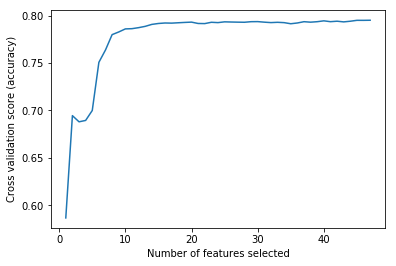

In [21]:
# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(1, len(rfecv.grid_scores_) + 1),
#     rfecv.grid_scores_,
# )
# plt.show()

In [22]:
# df.columns[:-1][rfecv.support_]

Index(['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_words', 'q2_words',
       'q1_characters', 'q2_characters', 'q1_u_words', 'q2_u_words',
       'q1_u_words_wo_sw', 'q2_u_words_wo_sw', 'total_u_words_wo_sw',
       'word_common', 'word_total', 'word_share', 'freq_sum', 'freq_diff',
       'chebyshev', 'braycurtis', 'cosine', 'correlation', 'canberra',
       'cityblock', 'euclidean', 'minkowski', 'squared_euclidean',
       'word_mover_distance', 'skew_q1', 'skew_q2', 'kurtosis_q1',
       'kurtosis_q2', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'token_set_ratio', 'longest_substr_ratio'],
      dtype='object')

In [23]:
# clf = DecisionTreeClassifier()
# _ = clf.fit(rfecv.transform(X_train_std), Y_train)

In [24]:
# clf.score(rfecv.transform(X_test_std), Y_test)

0.79511775909323179

In [25]:
# clf.score(rfecv.transform(X_test_std), Y_test)

0.79511775909323179